# Kaggle Titanic - Machine Learning from Disaster
Dataset : https://www.kaggle.com/competitions/titanic  
Another dataset to explore : https://www.kaggle.com/competitions?sortOption=numTeams&hostSegmentIdFilter=5

In [1]:
# "The only impossible journey is the one you never begin" — Tony Robbins

import os 

# Data Wrangling
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Background  
The sinking of the Titanic is one of the most infamous shipwrecks in history.  
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg.  
Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.  
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.  
In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

Objective : Prediction of people who were more likely to survive

## Workflow goals  
The data science solutions workflow solves for seven major goals.

**Classifying.**  
We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

**Correlating.**  
One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

**Converting.**  
For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

**Completing.**  
Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

**Correcting.**  
We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

**Creating.**  
Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

**Charting.**  
How to select the right visualization plots and charts depending on nature of the data and the solution goals.

# Exploring the Data

## General View

In [2]:
# Load dataset
data_path = os.getcwd() + '\\titanic-data\\train.csv'
base_df = pd.read_csv(data_path)
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
base_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Takeaways**  
- Total of 891 row and 12 columns
- Categorical columns include : Name, Sex, Ticket, Cabin, Embarked
- Numerical columns include : PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare
- Cabin data has 77% Null, might as well drop it because not containing much information (correcting #1)
- PassengerId, Name & Ticket may be dropped because not containing information relating survival (correcting #2)
- Ticket value seems to have incosistent format eg. 'STON/O2. 3101282' vs '113803'
- Age & Embarked may contain information regarding survival, null values need to be filled (completing #1)


Notes: Column definition can be read [here](https://www.kaggle.com/c/titanic/data)

In [4]:
# Numerical Value describe
base_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Catergorical Column Describe
base_df.describe(exclude=[int,float])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**Takeaways**
- More than half of the passenger not surviving (51.4%)
- q75 of the age is on 38, seems age have outlier. May to drop / correct / bin it later (correcting #3)
- SibSp, Parch & Fare also seems to have outlier. May to drop / correct / bin it later (correcting #4)
- At least 50% of passenger's Pclass is at 3, the lower socio-economic class
- The passenger have more male than female ,where male at 577 (64.7%) vs female at 314 (35.24%)
- Most of the passenger Embarked from port S (Southampton) : 644 (72.27%)
- A lot of passenger seems to traveling alone and also dont have siblings

In [6]:
# Initiate some of the table drop
# Correcting #1 & Correcting #2
df = base_df.drop(columns=['Cabin', 'PassengerId', 'Name', 'Ticket'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## Analyze the Features

### Pivoting Features  
There's some feature that we can quickly analyze by just pivoting the feature against survived column. Such as:
- Categorical Sex
- Categorical Pclass
- Categorical Embarked
- Discrete SibSp
- Discrete Parch

In [8]:
# Sex vs Survived
df[['Survived', 'Sex']].groupby('Sex', as_index=False).mean().sort_values('Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [9]:
# Pclass vs Survived
df[['Survived', 'Pclass']].groupby('Pclass', as_index=False).mean().sort_values('Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
# Embarked vs Survived
df[['Survived', 'Embarked']].groupby('Embarked', as_index=False).mean().sort_values('Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [11]:
# SibSp vs Survived
df[['Survived', 'SibSp']].groupby('SibSp', as_index=False).mean().sort_values('Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
# Parch vs Survived
df[['Survived', 'Parch']].groupby('Parch', as_index=False).mean().sort_values('Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


**Takeaways**  
- There's a real difference between men and women survival percentage. It's make sense that people put women as priority in emergencies.
- There seems to be a pattern in Pclass, the higher the social status, the higher the priority in emergency situation.
- Embarked port show a difference in survival rate. By logic, embarked port not something that can influence survivability but something else tied to the port.
    - Maybe it can mean Cherbourg port was a wealthier neighborhood. We can see it in comparison to Pclass
    - Maybe the the people that embark from Cherbourg get better position to the rescue boat; sadly we dont have data about this
- SibSp and Parch pattern kind of vague, maybe it can used to help other feature

### Visualizing Data

Some data are easier to digest by visualizing it. There's several points that we want to achieve, there are:  

- Ensure the relation between survivability vs embarked port vs Pclass
- Age vs Survived column
- Fare vs Survived column


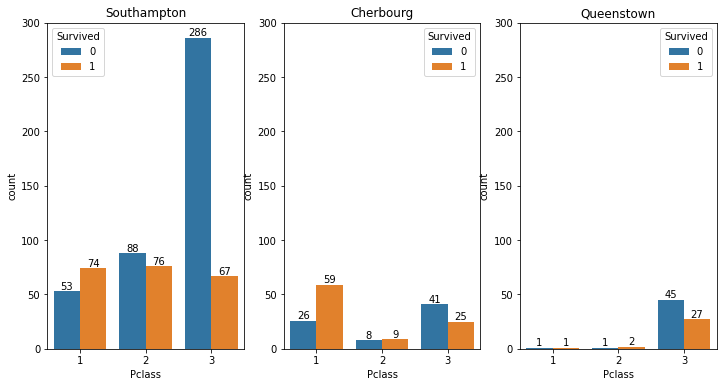

In [32]:
fig, ax = plt.subplots(1,3, figsize=(12,6))

fig1 = sns.countplot(data=df[df['Embarked']=='S'], x='Pclass', hue='Survived', ax=ax[0])
fig1.set(title='Southampton', ylim=(0,300))
for container in fig1.containers:
    fig1.bar_label(container)

fig2 = sns.countplot(data=df[df['Embarked']=='C'], x='Pclass', hue='Survived', ax=ax[1])
fig2.set(title='Cherbourg', ylim=(0,300))
for container in fig2.containers:
    fig2.bar_label(container)

fig3 = sns.countplot(data=df[df['Embarked']=='Q'], x='Pclass', hue='Survived', ax=ax[2])
fig3.set(title='Queenstown', ylim=(0,300))
for container in fig3.containers:
    fig3.bar_label(container)

**Takeaways**
- Embarked Port did not have correlation with Pclass
- Maybe it's gonna correlate with other feature

[Text(0.5, 1.0, 'Not Survived'), (0.0, 35.0), (0.0, 80.0)]

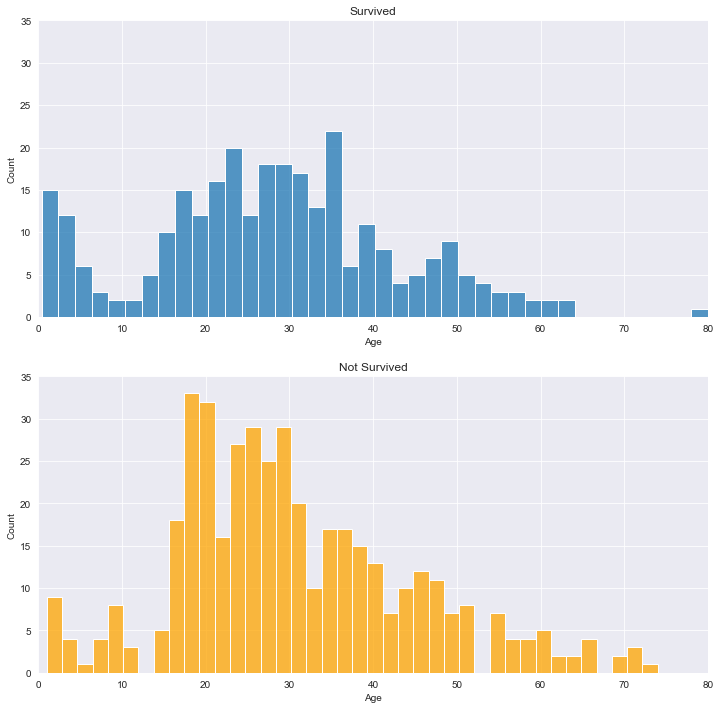

In [55]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(2,1, figsize= (12,12))

f1 = sns.histplot(df[df['Survived']==1],x='Age', bins=40, ax=ax[0])
f1.set(title='Survived', ylim=(0,35), xlim=(0,80))

f2 = sns.histplot(df[df['Survived']==0],x='Age', bins=40, ax=ax[1], color='orange')
f2.set(title='Not Survived', ylim=(0,35), xlim=(0,80))

**Takeaways**
- Most of the time, deceased percentage always higher except for the young ones
- The oldest passenger is 80 year old
- Most of the passenger between 18 up to 35
- Most death between 18 to 25



[Text(0.5, 1.0, 'Not Survived'), (0.0, 200.0), (0.0, 550.0)]

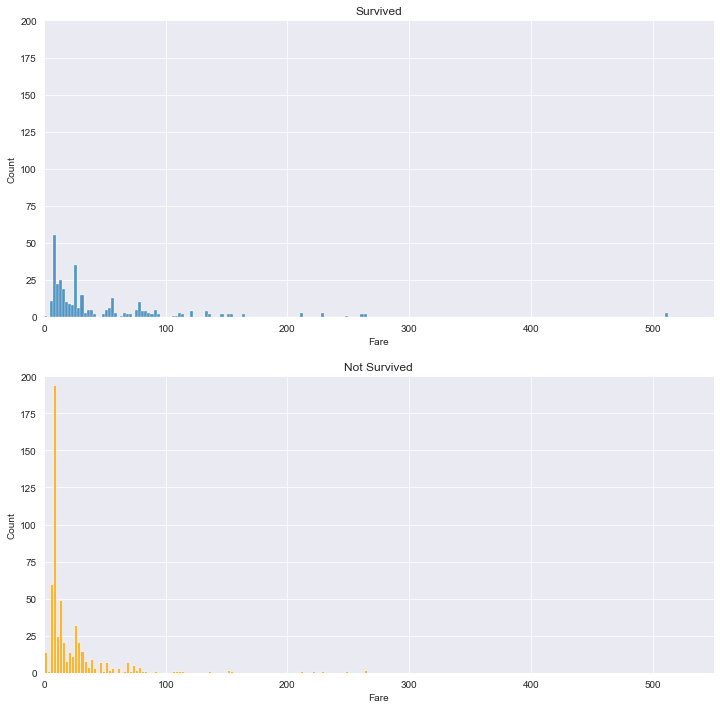

In [76]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(2,1, figsize= (12,12))

f1 = sns.histplot(df[df['Survived']==1],x='Fare', binwidth=2.5, ax=ax[0])
f1.set(title='Survived', ylim=(0,200), xlim=(0,550))

f2 = sns.histplot(df[df['Survived']==0],x='Fare', binwidth=2.5, ax=ax[1], color='orange')
f2.set(title='Not Survived', ylim=(0,200), xlim=(0,550))

c:\Users\Shendy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\Shendy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


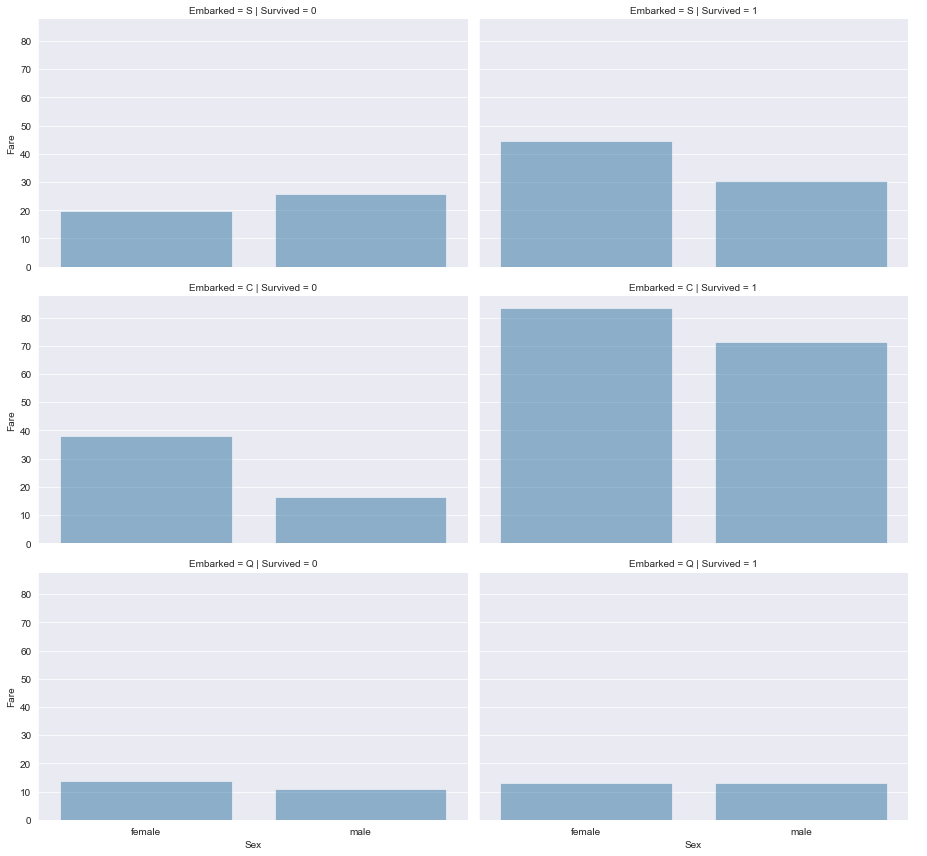

In [86]:
grid = sns.FacetGrid(df, row='Embarked', col='Survived', size=4, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

**Takeaways**
- The ticket fare vary so much
- Deceased passenger consentrated in 5 - 10 dollar
- It's confirm that PClass can affect survivability
